In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Alberi di decisione e sklearn

ogni nodo dell'albero contiene una condizione. In base alla condizione che soddisfa procede al relativo nodo successivo.
I "tagli" (valori sulle condizioni) vengono appresi automaticamente dall'algoritmo.

Tipicamente gli alberi vengono usati in ensamble (es. bagging(subsampling in parallelo)/boosting(errori pesati in modo seriale))

Gli alberi di decisione creano dei tagli solo lungo gli assi (es. un task di classificazione x>y riesce molto male) quindi potrebbe essere necessario un preprocessing dei dati o meglio proprio cambiare algoritmo

Tipicamente il workflow in sklearn è:
1. Importare il modello
2. Scegliere gli ipeparametri istanziando la classe
3. fittare il modello con la funzione fit()
4. Fare predizioni sui nuovi dati con predict() (oppure in alcuni modelli unsupervised tranform() )


Esempio: classificazione dei fiori

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


/usr/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


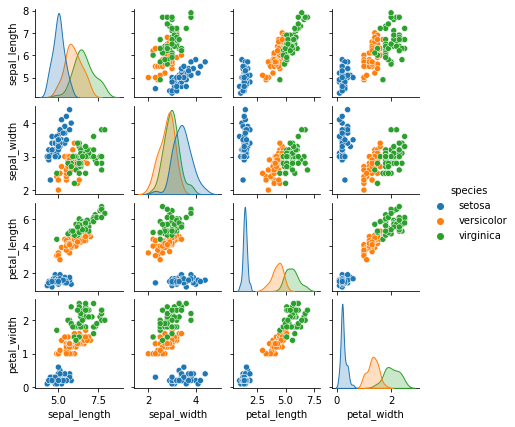

In [2]:
import seaborn as sns
iris=sns.load_dataset('iris')
print(iris)
sns.pairplot(iris, hue='species', size=1.5)

0.9777777777777777


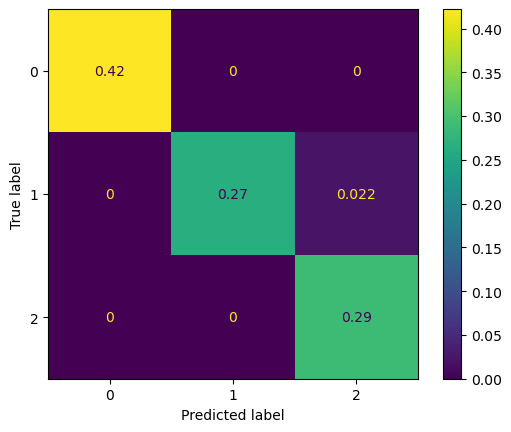

In [10]:
#Naive bayes classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
iris_np=np.array(iris)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(iris_np[:,:-1], iris_np[:,-1], test_size=0.3, random_state=42) #random state riguarda lo shuffling dei dati
model=GaussianNB()
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
print(accuracy_score(Ytest, y_pred))
ConfusionMatrixDisplay(confusion_matrix(Ytest, y_pred)/len(Ytest)).plot()


# Keras

## Assegnamento 1
- Partiziona una regione 2D (es 1 se y>|sin (2 pi x)|)

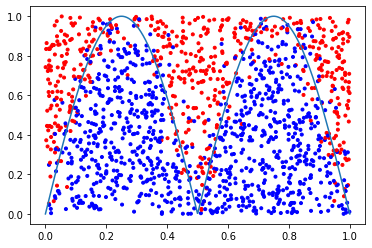

In [117]:
N=1500
data=np.random.uniform(0,1,size=(N,2))
mask=data[:,1]>np.abs((np.sin(2*np.pi*data[:,0]))+np.random.normal(0,0.2,N))
plt.scatter(data[:,0],data[:,1],color=["red" if i else "blue" for i in mask],marker=".")
xx=np.linspace(0,1,1000)
plt.plot(xx,np.abs(np.sin(2*np.pi*xx)))


In [124]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

x=Input(shape=(2,))
hidden=Dense(500,activation='relu')(x)
hidden=Dense(500,activation='relu')(hidden)
hidden=Dense(100,activation='relu')(hidden)
out=Dense(1,activation='sigmoid')(hidden)
model=Model(inputs=x,outputs=out)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(data,mask*1,epochs=60)

Epoch 1/60
47/47 [==============================] - 2s 15ms/step - loss: 0.5979 - accuracy: 0.6953
Epoch 2/60
47/47 [==============================] - 1s 19ms/step - loss: 0.5029 - accuracy: 0.7560
Epoch 3/60
47/47 [==============================] - 1s 22ms/step - loss: 0.4764 - accuracy: 0.7787
Epoch 4/60
47/47 [==============================] - 1s 20ms/step - loss: 0.4549 - accuracy: 0.7913
Epoch 5/60
47/47 [==============================] - 1s 20ms/step - loss: 0.4435 - accuracy: 0.7980
Epoch 6/60
47/47 [==============================] - 1s 19ms/step - loss: 0.4469 - accuracy: 0.8007
Epoch 7/60
47/47 [==============================] - 1s 17ms/step - loss: 0.4426 - accuracy: 0.8040
Epoch 8/60
47/47 [==============================] - 1s 17ms/step - loss: 0.4521 - accuracy: 0.7893
Epoch 9/60
47/47 [==============================] - 1s 20ms/step - loss: 0.4357 - accuracy: 0.8087
Epoch 10/60
47/47 [==============================] - 1s 19ms/step - loss: 0.4325 - accuracy: 0.8020
Epoch 11/

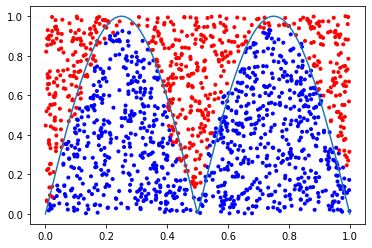

In [125]:
test=np.random.uniform(size=(N,2))
pred=model.predict(test)
test_label=np.heaviside(pred-0.5,0)
plt.scatter(test[:,0],test[:,1],color=["red" if i else "blue" for i in test_label],marker=".")
plt.plot(xx,np.abs(np.sin(2*np.pi*xx)))

## Assegnamento 2: CNN

Riconoscimento di cerchio/quadrato e localizzazione tramite CNN. Inoltre qui si fornisce come esempio l'applicazione dei callback (In questo caso solo early stopping)

In [110]:
# creazione delle immagini
image_size=100
def create_circle(radius_fraction_min=10, radius_fraction_max=5,noise_fraction=180):
    center=np.random.uniform(0,image_size,size=(2))
    radius=np.random.uniform(image_size/radius_fraction_min,image_size/radius_fraction_max,size=(2))
    matrix=np.zeros(shape=(image_size,image_size))
    X,Y=np.ogrid[:image_size,:image_size]
    matrix[((X+np.random.normal(0,image_size/noise_fraction,size=(image_size,1))-center[0])/radius[0])**2+((Y+np.random.normal(0,image_size/noise_fraction,size=(image_size))-center[1])/radius[1])**2<1]=1
    y0,x0=center
    Ly,Lx=radius
    return matrix,np.array([[x0+Lx,y0+Ly,x0-Lx,y0-Ly]])
def create_square(frac_min=10,frac_max=5,noise_fraction=180):
    center=np.random.uniform(0,image_size,size=(2))
    lenght=np.random.uniform(image_size/frac_min,image_size/frac_max,size=(2))
    matrix=np.zeros(shape=(image_size,image_size))
    X,Y=np.ogrid[:image_size,:image_size]
    matrix[((X+np.random.normal(0,image_size/noise_fraction,size=(image_size,1))<center[0]+lenght[0]/2) & (X+np.random.normal(0,image_size/noise_fraction,size=(image_size,1))>center[0]-lenght[0]/2) & (Y+np.random.normal(0,image_size/noise_fraction,size=(image_size))<center[1]+lenght[1]/2) & (Y+np.random.normal(0,image_size/noise_fraction,size=(image_size))>center[1]-lenght[1]/2))]=1
    y0,x0=center
    Ly,Lx=lenght/2
    return matrix,np.array([[x0+Lx,y0+Ly,x0-Lx,y0-Ly]])

In [158]:
def create_dataset(N=300):
    circle=np.random.randint(2, size=(N,))
    square=1-circle
    images=[]
    positions=[]
    for i in circle:
        if i==1:
            im,pos=create_circle()
            images.append(im)
            positions.append(pos)
        else:
            im,pos=create_square()
            images.append(im)
            positions.append(pos)
    images=np.array(images)
    positions=np.array(positions)
    images=np.reshape(images,(N,image_size,image_size,1))
    positions=np.reshape(positions,(N,4))
    train_label=[np.column_stack((circle,square)),positions]
    #train_label=[circle,positions]
    return images,train_label
images,train_label=create_dataset(N=800)

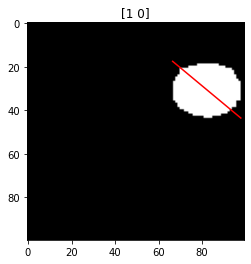

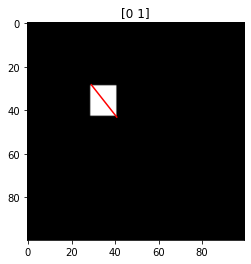

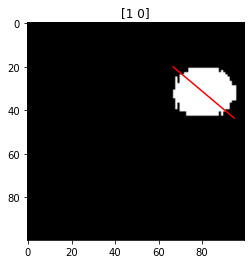

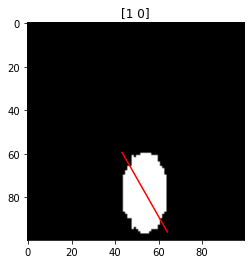

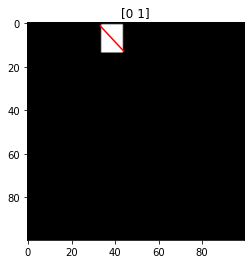

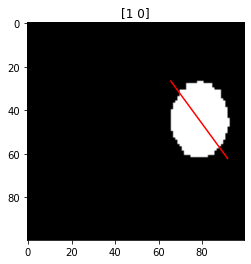

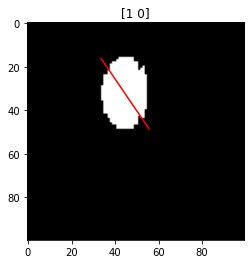

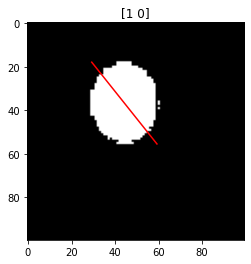

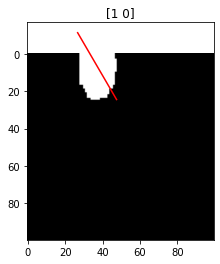

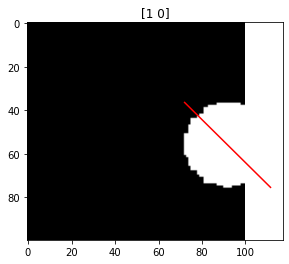

In [159]:
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.title(f"{train_label[0][i]}")
    x=[train_label[1][i,0],train_label[1][i,2]]
    y=[train_label[1][i,1],train_label[1][i,3]]
    plt.plot(x,y,color='red')
    plt.show()

In [170]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

inputs=Input(shape=(image_size,image_size,1,))
hidden=  Conv2D(50,(5,5), activation='relu')(inputs)
hidden= MaxPooling2D((3,3))(hidden)
hidden=  Conv2D(50,(3,3), activation='relu')(hidden)
hidden= MaxPooling2D((3,3))(hidden)
#hidden=  Conv2D(3,(3,3), activation='relu')(hidden)
hidden= Flatten()(hidden)
hidden=  Dense(50, activation='relu')(hidden)
hidden=  Dense(20, activation='relu')(hidden)
hidden=  Dense(20, activation='relu')(hidden)
#hidden=  Dense(40, activation='relu')(hidden)
#hidden=  Dense(30, activation='relu')(hidden)
out_class=Dense(2,activation='softmax')(hidden)
out_regr=Dense(4,activation='linear')(hidden)
outputs=[out_class,out_regr]
model=Model(inputs=inputs,outputs=outputs)
model.summary()



Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 96, 96, 50)   1300        ['input_15[0][0]']               
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 32, 32, 50)  0           ['conv2d_31[0][0]']              
 )                                                                                                
                                                                                           

In [171]:
model.compile(loss=['binary_crossentropy',"MSE"],optimizer='adam',metrics=['accuracy'])
history=model.fit(images,train_label,epochs=100,batch_size=32,validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0000001,patience=15)])

Epoch 1/100
18/18 [==============================] - 7s 329ms/step - loss: 3197.6702 - dense_67_loss: 0.9023 - dense_68_loss: 3196.7678 - dense_67_accuracy: 0.4893 - dense_68_accuracy: 0.5089 - val_loss: 2238.6440 - val_dense_67_loss: 2.8138 - val_dense_68_loss: 2235.8303 - val_dense_67_accuracy: 0.4875 - val_dense_68_accuracy: 0.4875
Epoch 2/100
18/18 [==============================] - 5s 287ms/step - loss: 1340.6985 - dense_67_loss: 12.9862 - dense_68_loss: 1327.7123 - dense_67_accuracy: 0.5107 - dense_68_accuracy: 0.5607 - val_loss: 569.4500 - val_dense_67_loss: 22.1245 - val_dense_68_loss: 547.3254 - val_dense_67_accuracy: 0.4875 - val_dense_68_accuracy: 0.7667
Epoch 3/100
18/18 [==============================] - 5s 282ms/step - loss: 450.5272 - dense_67_loss: 18.2429 - dense_68_loss: 432.2843 - dense_67_accuracy: 0.5107 - dense_68_accuracy: 0.8232 - val_loss: 326.6625 - val_dense_67_loss: 16.0814 - val_dense_68_loss: 310.5811 - val_dense_67_accuracy: 0.4875 - val_dense_68_accuracy

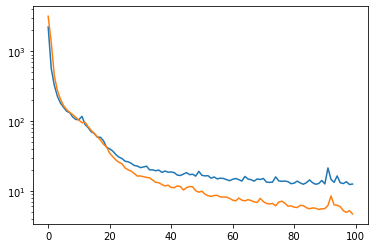

In [172]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.yscale('log')

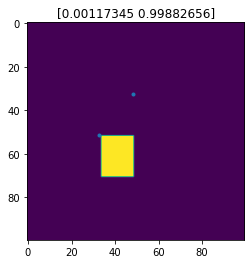

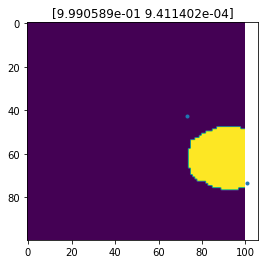

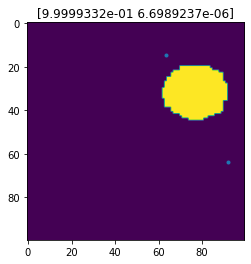

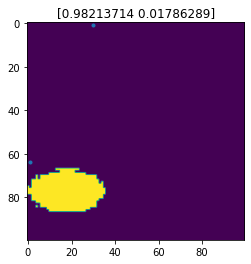

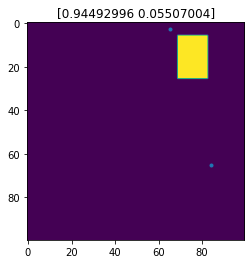

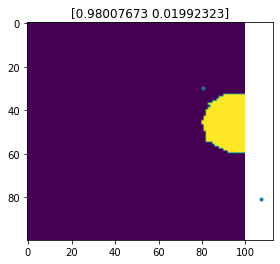

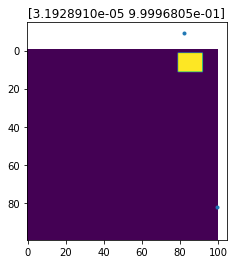

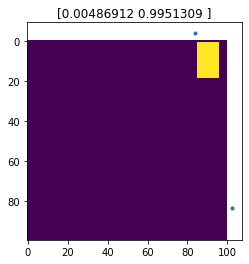

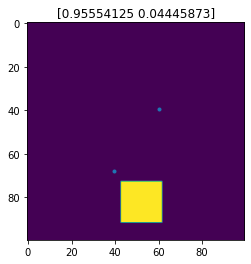

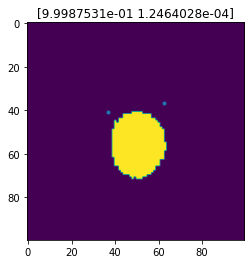

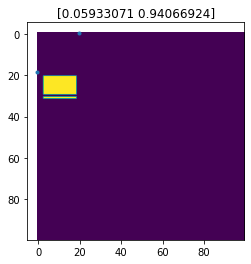

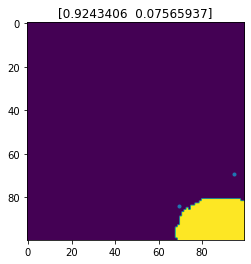

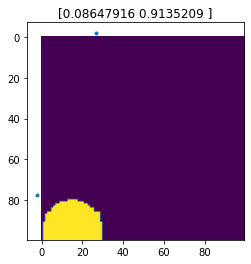

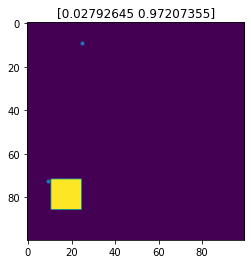

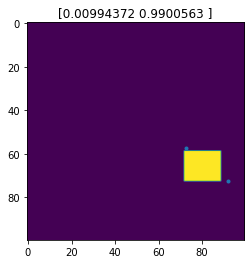

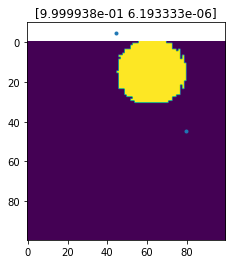

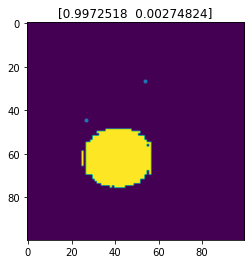

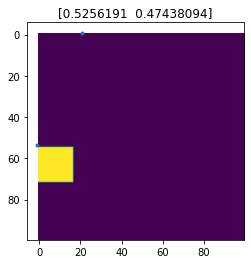

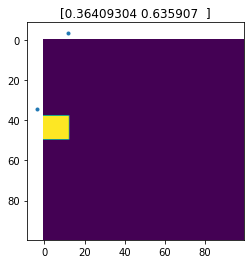

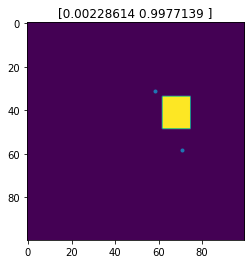

In [173]:
pred_data,pred_label=create_dataset(N=20)
cat,pos=model.predict(pred_data)
for idx,image in enumerate(pred_data):
    plt.imshow(image)
    plt.title(f"{cat[idx]}")
    x0,y0,x1,y1=pos[idx]
    plt.plot([x0,x1],[x1,y1],".")
    plt.show()

### Definizione di un callback custom

## Assegnamento 3: LSTM

## Assegnamento 4: Graph Network